# 探索特性
看起来很无厘头，但也许还有一点点思路：
1. 描述性统计：利用均值、中位数、标准差、四分位数等统计量描述数据的基本特征，以及数据分布的偏态和峰度等信息。
2. 可视化分析：通过图表和图像展示数据的分布、关系和趋势。例如，直方图、散点图、箱线图、折线图等。
3. 相关性分析：通过计算两个变量之间的相关系数（如Pearson系数）或者绘制相关矩阵来分析变量之间的关系。
4. 数据聚类：对数据进行聚类，将相似的数据点分为一类，从而发现数据中的不同类别。
5. 数据降维：将高维数据降维到低维，以便更好地可视化和分析数据。常用的降维方法包括主成分分析（PCA）、线性判别分析（LDA）等。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw = pd.read_excel("./Normalized_table.xlsx")
raw

,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,...,Replication number,Means,Stddev,Normal_1,Normal_2,Normal_3,Normal_4,Normal_5,Normal_6,Normal_7
0,358,1/7/22,202,slump,80630,1362,1,3,23.0,39,...,1,4.13,1.055036,0.006047,0.054840,0.214032,0.361885,0.265855,0.084712,0.011639
1,357,1/8/22,203,crank,101503,1763,1,5,23.0,31,...,1,4.22,1.204824,0.010977,0.064719,0.198350,0.316832,0.264086,0.114809,0.025979
2,356,1/9/22,204,gorge,91477,1913,1,3,13.0,27,...,2,4.64,1.212601,0.004486,0.033992,0.134777,0.280467,0.306863,0.176566,0.053355
3,355,1/10/22,205,query,107134,2242,1,4,16.0,30,...,1,4.43,1.176903,0.005975,0.044119,0.164189,0.309012,0.294654,0.142330,0.034755
4,354,1/11/22,206,drink,153880,3017,1,9,35.0,34,...,1,3.77,1.085923,0.016991,0.102807,0.280722,0.347463,0.195149,0.049599,0.005672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,4,12/27/22,556,condo,20879,2012,0,2,17.0,35,...,2,4.45,1.080509,0.003037,0.032396,0.154082,0.328812,0.315962,0.136687,0.026516
351,3,12/28/22,557,impel,20160,1937,0,3,21.0,40,...,1,4.15,0.997635,0.003824,0.045122,0.208276,0.379793,0.274862,0.078749,0.008854
352,2,12/29/22,558,havoc,20001,1919,0,2,16.0,38,...,1,4.40,1.019804,0.002164,0.028994,0.157523,0.350310,0.320569,0.120638,0.018553
353,1,12/30/22,559,molar,21204,1973,0,4,21.0,38,...,1,4.14,1.024209,0.004785,0.049688,0.211365,0.371363,0.270497,0.081508,0.010087


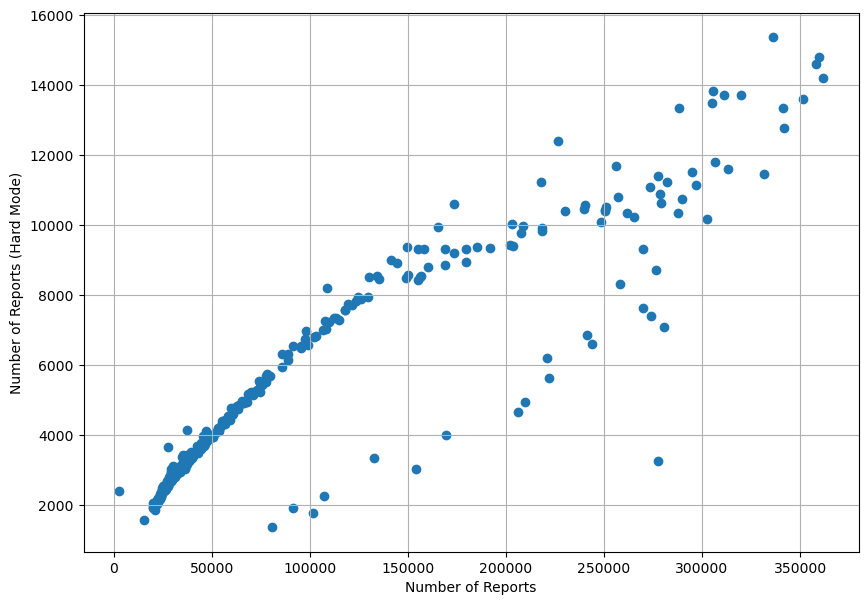

In [5]:
fig,ax=plt.subplots(figsize=(10,7))
sorted= raw.sort_values('Number of  reported results')
ax.scatter(sorted.loc[:,'Number of  reported results'], sorted.loc[:,'Number in hard mode'])
ax.set_xlabel("Number of Reports")
ax.set_ylabel("Number of Reports (Hard Mode)")
ax.grid(True)
plt.show(fig)

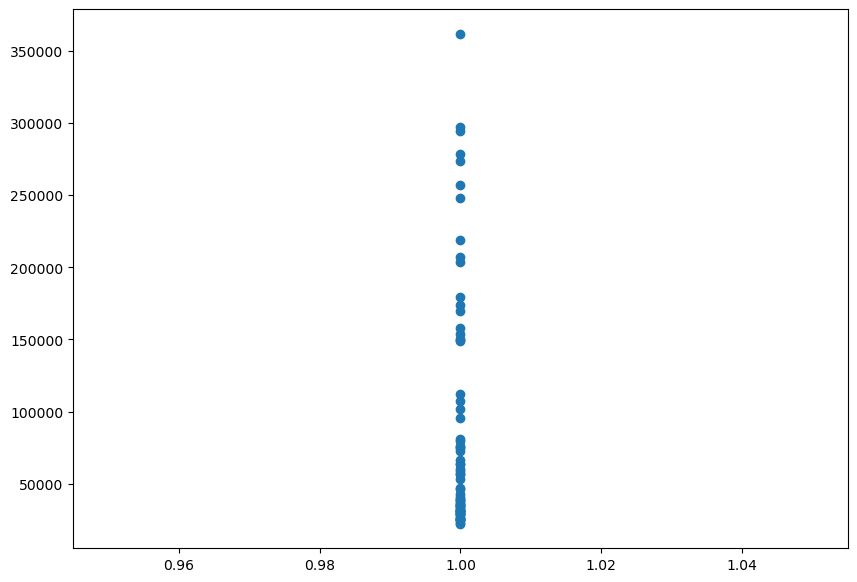

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

use=raw.loc[:,['Number of  reported results','Number in hard mode']]
use = PolynomialFeatures(5).fit_transform(use.iloc[:,0].to_numpy().reshape((-1,1)), use.iloc[:,1].to_numpy().reshape((-1,1)))
xtrain,xtest,ytrain,ytest=train_test_split(use[:,0].reshape((-1,1)), use[:,1].reshape((-1,1)), test_size=0.2)
model=LinearRegression(copy_X=True).fit(xtrain, ytrain)

prd = model.predict(xtest)

fig,ax=plt.subplots(figsize=(10,7))
ax.scatter(xtest,ytest)
ax.plot(xtest,prd)
plt.show(fig)